# Практична робота №3

### Студента групи МІТ-31 (підгрупа 1)

### Добровольського Арсенія Михайловича

### Завдання: Прогнозування ціни житла

#### Ваше завдання - побудувати модель регресії для прогнозування ціни житла на основі реально згенерованих даних.

**Крок 1: Генерація даних**

1. Згенеруйте 1000 спостережень для ознаки "Площа житла" (площа квартири в квадратних метрах) в діапазоні від 50 до 200 квадратних метрів.

2. Згенеруйте 1000 спостережень для ознаки "Кількість спалень" в діапазоні від 1 до 5 спалень.

3. Згенеруйте 1000 спостережень для ознаки "Відстань до центру міста" в діапазоні від 1 до 20 км.

4. Згенеруйте цільову змінну - ціну житла (в тисячах доларів) на основі ознак "Площа житла", "Кількість спалень" та "Відстань до центру міста". Модель ціни може бути, наприклад, такою: `ціна = 10 * площа + 5 * спальні - 2 * відстань + похибка`, де похибка - це випадковий шум.

**Крок 2: Розділення даних**

Розділіть ваші дані на навчальний та тестовий набори в співвідношенні 80% - 20%.

**Крок 3: Побудова моделі регресії**

1. Використовуйте бібліотеку Python (наприклад, Scikit-Learn) для побудови моделі лінійної регресії.

2. Навчіть модель на навчальних даних, використовуючи ознаки "Площа житла", "Кількість спалень" та "Відстань до центру міста" для прогнозу ціни житла.

**Крок 4: Оцінка моделі**

1. Використайте модель для здійснення прогнозів на тестовому наборі.

2. Оцініть якість моделі за допомогою метрик, таких як середньоквадратична помилка (MSE) та коефіцієнт детермінації (R^2).

**Крок 5: Візуалізація результатів**

1. Побудуйте графік, на якому відобразіть реальні ціни житла та прогнозовані моделлю ціни для тестового набору.

2. Додайте лінію, яка відображає ідеальні результати (реальні ціни житла) для порівняння.

**Крок 6: Висновки**

Напишіть короткий звіт, де ви розповідаєте про якість моделі та її здатність прогнозувати ціну житла на основі введених ознак.


First 5 rows:
   Housing area  Number of bedrooms  City centre        Price
0           146                   4            8  1467.528105
1            81                   3           10   805.800314
2           200                   1            2  2002.957476
3           176                   1           18  1733.481786
4           141                   5           11  1416.735116

Descriptive data statistics:
       Housing area  Number of bedrooms  City centre        Price
count   1000.000000         1000.000000  1000.000000  1000.000000
mean     122.694000            2.963000    10.082000  1221.500487
std       44.280618            1.435162     5.766848   443.544222
min       50.000000            1.000000     1.000000   472.994367
25%       83.750000            2.000000     5.000000   826.932595
50%      123.500000            3.000000    10.000000  1231.214694
75%      161.000000            4.000000    15.000000  1604.399849
max      200.000000            5.000000    20.000000  20

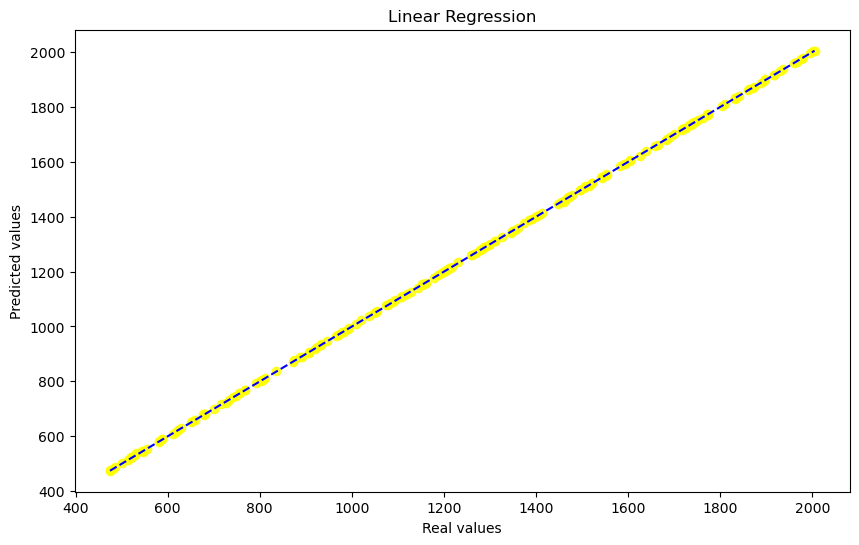

['housing_model.pkl']

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

np.random.seed(0)
n_samples = 1000
noise = np.random.normal(0, 2, n_samples)

# STEP 1
data = {
    'Housing area': np.random.randint(50, 201, size = 1000),
    'Number of bedrooms': np.random.randint(1, 6, size = 1000),
    'City centre': np.random.randint(1, 21, size = 1000)
}

# Price column (target variable) generation based on the first three features (predictors)
data['Price'] = 10 * data['Housing area'] + 5 * data['Number of bedrooms'] - 2 * data['City centre'] + noise

df = pd.DataFrame(data)
df.to_csv('housing_data.csv', index=False)

# STEP 2
data = pd.read_csv('housing_data.csv')
print("First 5 rows:")
print(data.head())
print("\nDescriptive data statistics:")
print(data.describe())

X = data.drop('Price', axis=1) # Predictor variables
y = data['Price'] # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

# STEP 3
model = LinearRegression()
model.fit(X_train, y_train)

# STEP 4
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"\nMSE = {mse:.2f}, R^2 = {r2:.2f}")

# STEP 5
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha = 0.8, color = 'yellow')
plt.plot([min(y_test), max(y_test)], [min(y_pred), max(y_pred)], linestyle='--', color = 'blue')
plt.title("Linear Regression")
plt.xlabel("Real values")
plt.ylabel("Predicted values")
plt.show()

# Saving the model
joblib.dump(model, 'housing_model.pkl')

**Висновок**: Поглянувши на отримане значення коефіцієнта детермінації (R^2 = 1), можна стверджувати, що дана модель є надзвичайно якісною для здійснення прогнозів ціни житла на основі введених ознак. Зокрема з вихідного графіку чітко видно, що всі точки (тобто значення цін на житло) чітко лежать на лінії регресії, що також підтверджує, що дана модель ідеально виконує поставлені перед нею завдання.